In [1]:
library(dplyr)
library(Seurat)
#library(umap)
#library(FactoMineR)
suppressPackageStartupMessages(library(Seurat))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(patchwork))
#suppressPackageStartupMessages(library(refGenome))
suppressPackageStartupMessages(library(data.table))
suppressPackageStartupMessages(library(future))
suppressPackageStartupMessages(library(ggrepel))
#suppressPackageStartupMessages(library(WGCNA))
suppressPackageStartupMessages(library(lsa))
suppressPackageStartupMessages(library(ComplexHeatmap))
suppressPackageStartupMessages(library(circlize))
suppressPackageStartupMessages(library(stringr))


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


The legacy packages maptools, rgdal, and rgeos, underpinning this package
will retire shortly. Please refer to R-spatial evolution reports on
https://r-spatial.org/r/2023/05/15/evolution4.html for details.
This package is now running under evolution status 0 

rgeos version: 0.6-3, (SVN revision 696)
 GEOS runtime version: 3.11.2-CAPI-1.17.2 
 Please note that rgeos will be retired during October 2023,
plan transition to sf or terra functions using GEOS at your earliest convenience.
See https://r-spatial.org/r/2023/05/15/evolution4.html for details.
 GEOS using OverlayNG
 Linking to sp version: 1.6-1 
 Polygon checking: TRUE 


Attaching SeuratObject



# Cell type annotation

In [2]:
# df6<-readRDS("/projects/ps-gleesonlab7/User/chchung/4_interneuron/2022-09-09_10XGE_pilot/Ctrl8553.rds")
# df7<-readRDS("/projects/ps-gleesonlab7/User/chchung/4_interneuron/2022-09-09_10XGE_pilot/Ctrl8718.rds")
# df8 <- readRDS("/projects/ps-gleesonlab7/User/chchung/3_FCD_project1/2021-10-26_FCD_snRNAseq/2021-10-29_20211026_FCD_snRNAseq_CTRL83538352_demuxlet_4556nu.rds")
# df8<-readRDS("/projects/ps-gleesonlab8/Uniformly_processed_data/20230609_Changuk_Interneuron_10XGE_IGM/TBR1.rds")
# countsData1<-read.delim(file = "/projects/ps-gleesonlab8/User/chchung/DRG/20230616_bioskryb_interneuron_plate1_Changuk.csv", header = TRUE, sep = ",",row.names = 1)
# countsData2<-read.delim(file = "/projects/ps-gleesonlab8/User/chchung/DRG/20230616_bioskryb_interneuron_plate2_Changuk.csv", header = TRUE, sep = ",",row.names = 1)
# countsData3<-read.delim(file = "/projects/ps-gleesonlab8/User/chchung/DRG/20230616_bioskryb_interneuron_plate3_Changuk.csv", header = TRUE, sep = ",",row.names = 1)
countsData4<-read.delim(file = "/projects/ps-gleesonlab8/User/chchung/DRG/20230708_bioskryb_interneuron_plate1_1_Changuk_rawcount.csv", header = TRUE, sep = ",",row.names = 1)
countsData5<-read.delim(file = "/projects/ps-gleesonlab8/User/chchung/DRG/20230708_bioskryb_interneuron_plate1_2_23_Changuk_rowcount.csv", header = TRUE, sep = ",",row.names = 1)


In [3]:
# rownames(countsData1)<-countsData1$SYMBOL
# countsData1<-countsData1[,!colnames(countsData1) %in% (c("Chr","Start","End","Strand","Length","SYMBOL"))]
# rownames(countsData2)<-countsData2$SYMBOL
# countsData2<-countsData2[,!colnames(countsData2) %in% (c("Chr","Start","End","Strand","Length","SYMBOL"))]
# rownames(countsData3)<-countsData3$SYMBOL
# countsData3<-countsData3[,!colnames(countsData3) %in% (c("Chr","Start","End","Strand","Length","SYMBOL"))]
rownames(countsData4)<-countsData4$SYMBOL
countsData4<-countsData4[,!colnames(countsData4) %in% (c("Chr","Start","End","Strand","Length","SYMBOL"))]
rownames(countsData5)<-countsData5$SYMBOL
countsData5<-countsData5[,!colnames(countsData5) %in% (c("Chr","Start","End","Strand","Length","SYMBOL"))]

In [4]:
# df1 <- CreateSeuratObject(counts =(countsData1), project = "bioskryb_7669_old_F")
# df2 <- CreateSeuratObject(counts =(countsData2), project = "bioskryb_7669_old_T")
# df3 <- CreateSeuratObject(counts =(countsData3), project = "bioskryb_7669_old_HIP")
df4 <- CreateSeuratObject(counts =(countsData4), project = "bioskryb_7669_F1")
df5 <- CreateSeuratObject(counts =(countsData5), project = "bioskryb_7669_F2TH")

In [5]:
df0 <- merge(df4, y = c(df5), 
             add.cell.ids = c("bioskryb_7669_F1","bioskryb_7669_F2TH"))

In [6]:
merge<-df0

In [7]:
unique(merge@meta.data$orig.ident)

[1] "X.projects.ps.gleesonlab8.User.arzoo.20230706"
[2] "X.projects.ps.gleesonlab8.User.arzoo.20230727"

In [8]:
df0@meta.data[df0@meta.data$orig.ident=="X.projects.ps.gleesonlab8.User.arzoo.20230706",]$orig.ident<-"bioskryb_7669_F1"
df0@meta.data[df0@meta.data$orig.ident=="X.projects.ps.gleesonlab8.User.arzoo.20230727",]$orig.ident<-"bioskryb_7669_F2TH"

In [9]:
my_string <- rownames(df0@meta.data)
extracted <- str_extract(my_string, "SC\\d{2}")
print(extracted)
df0@meta.data$Cell_ID<-c(extracted)

my_string <- rownames(df0@meta.data[df0@meta.data$orig.ident=="bioskryb_7669_F1",])
my_string2 <- rownames(df0@meta.data[df0@meta.data$orig.ident=="bioskryb_7669_F2TH",])

extracted <- str_extract(my_string, "PL01\\..*?(?=\\.)")
extracted2 <- str_extract(my_string2, "PL0._.*?(?=_)")

df0@meta.data$Region<-c(extracted, extracted2)

  [1] "SC01" "SC02" "SC03" "SC04" "SC05" "SC07" "SC08" "SC09" "SC10" "SC11"
 [11] "SC12" "SC13" "SC14" "SC15" "SC16" "SC17" "SC18" "SC19" "SC20" "SC21"
 [21] "SC22" "SC23" "SC24" "SC25" "SC26" "SC27" "SC28" "SC29" "SC30" "SC31"
 [31] "SC32" "SC33" "SC34" "SC35" "SC36" "SC37" "SC38" "SC39" "SC40" "SC41"
 [41] "SC42" "SC43" "SC44" "SC45" "SC46" "SC47" "SC48" "SC49" "SC50" "SC51"
 [51] "SC53" "SC54" "SC55" "SC56" "SC57" "SC58" "SC59" "SC60" "SC61" "SC62"
 [61] "SC65" "SC67" "SC68" "SC69" "SC70" "SC71" "SC72" "SC73" "SC74" "SC75"
 [71] "SC76" "SC77" "SC78" "SC79" "SC82" "SC86" "SC87" "SC89" "SC90" "SC91"
 [81] "SC92" "SC93" "SC94" "SC96" "SC01" "SC02" "SC03" "SC04" "SC05" "SC06"
 [91] "SC07" "SC08" "SC09" "SC10" "SC11" "SC12" "SC13" "SC14" "SC15" "SC16"
[101] "SC17" "SC18" "SC19" "SC20" "SC21" "SC22" "SC23" "SC24" "SC25" "SC26"
[111] "SC27" "SC28" "SC29" "SC30" "SC31" "SC32" "SC33" "SC34" "SC35" "SC36"
[121] "SC37" "SC38" "SC39" "SC40" "SC41" "SC42" "SC43" "SC44" "SC45" "SC46"
[131] "SC47"

In [10]:
df0@meta.data[df0@meta.data$Region=="PL01.Frontal",]$Region<-"PL01_Frontal"

In [11]:
Idents(df0)<-"Region"

In [12]:
df0[["percent.mt"]] <- PercentageFeatureSet(df0, pattern = "^MT-")

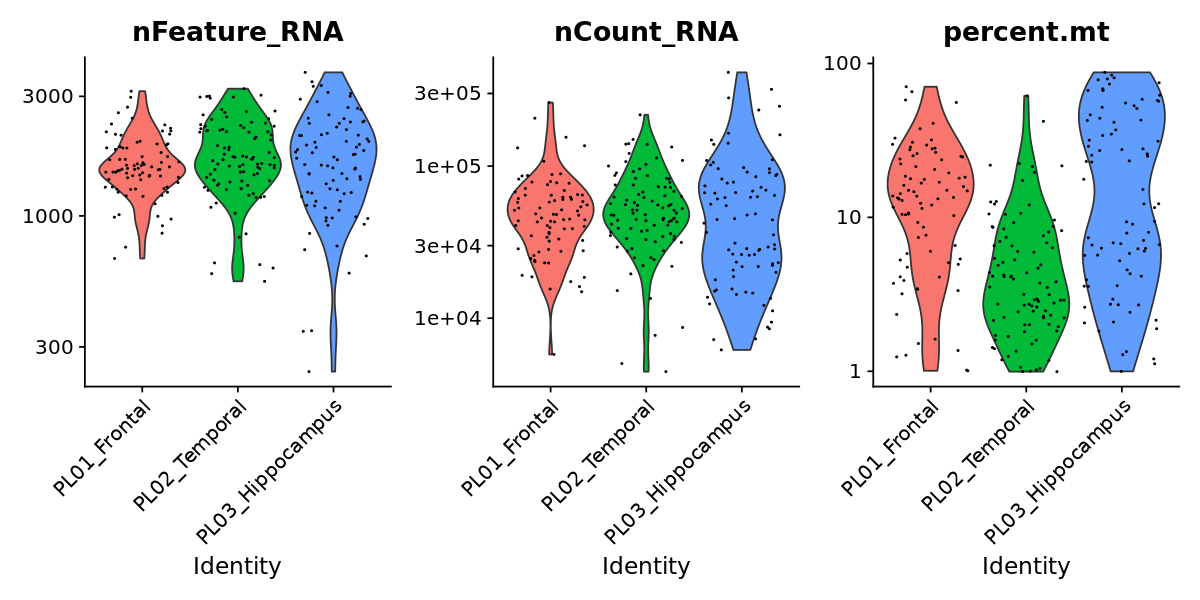

In [13]:
options(repr.plot.width=10, repr.plot.height=5)
VlnPlot(df0,
        log = T, 
        features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), 
        group.by = "Region", 
        pt.size=0.2,
        ncol = 3)

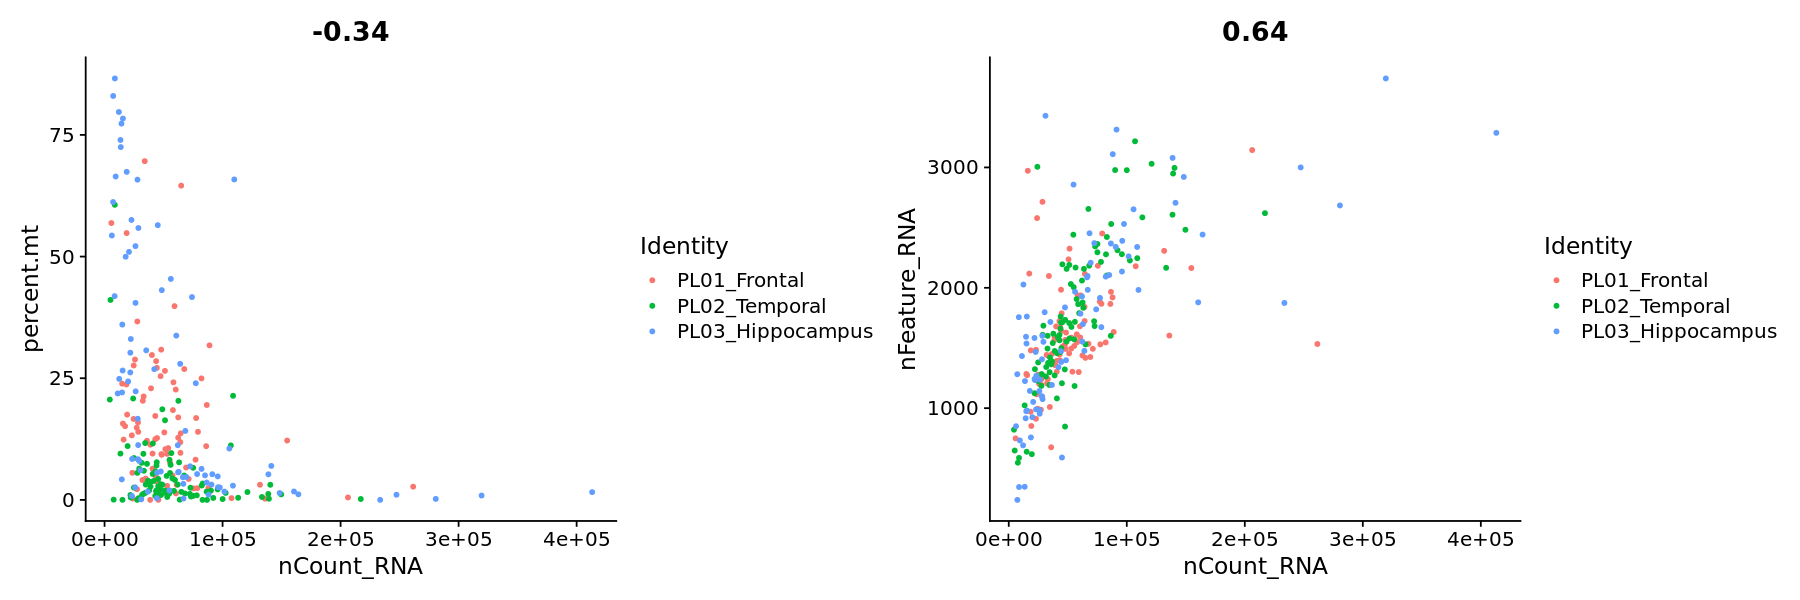

In [14]:
options(repr.plot.width=15, repr.plot.height=5)
plot1 <- FeatureScatter(df0, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(df0, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2

In [15]:
protein_coding <- read.csv("/projects/ps-gleesonlab7/gleeson3/user/zhen/data/snARseq/HEK/2019-12-25_GRCh38-95_auto_protein_coding_genes.csv",
                           header = T, row.names = 1)

In [16]:
df0 <- df0[protein_coding$gene_name,]

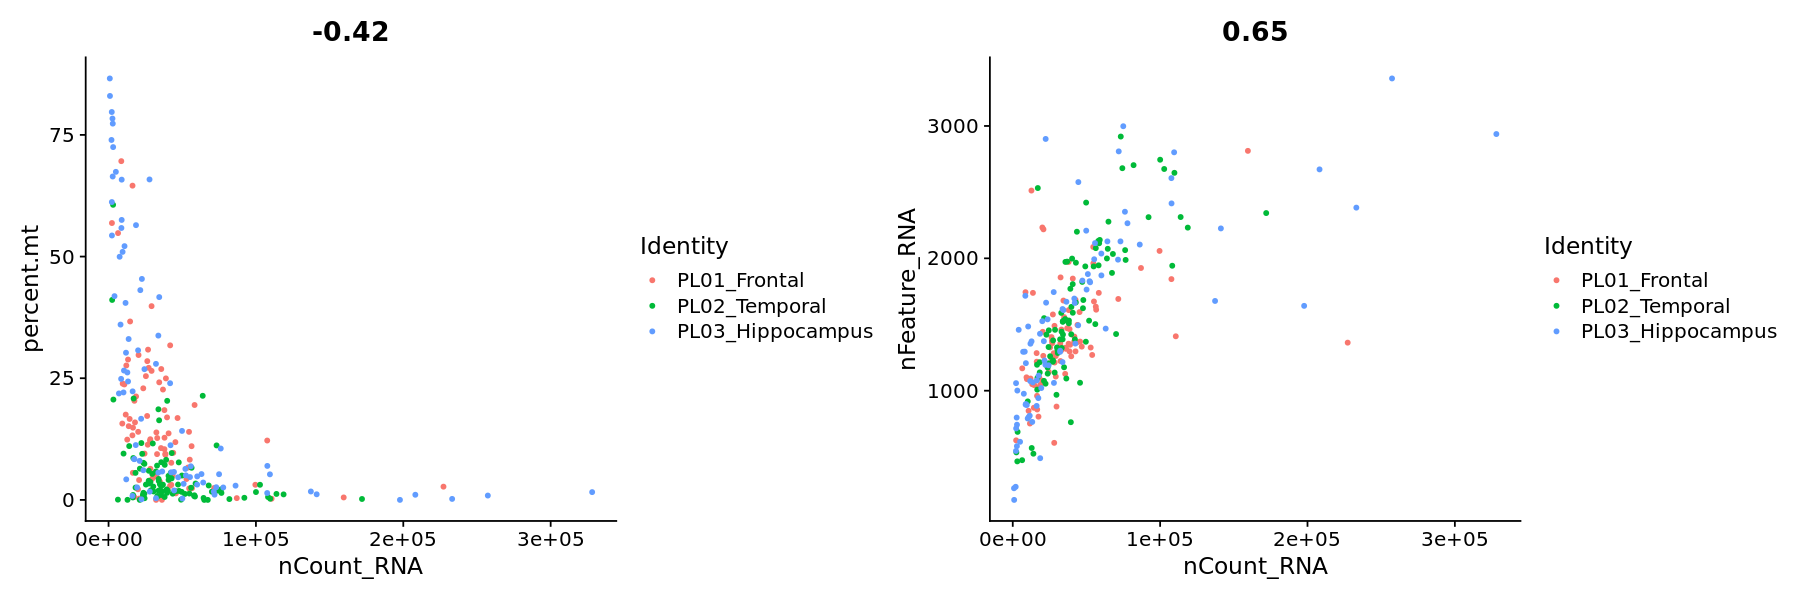

In [17]:
options(repr.plot.width=15, repr.plot.height=5)
plot1 <- FeatureScatter(df0, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(df0, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2

In [18]:
#write.csv(df0@meta.data[df0@meta.data$experiment=="bioskryb",],"bioskryb_comparison_unfiltered.csv")

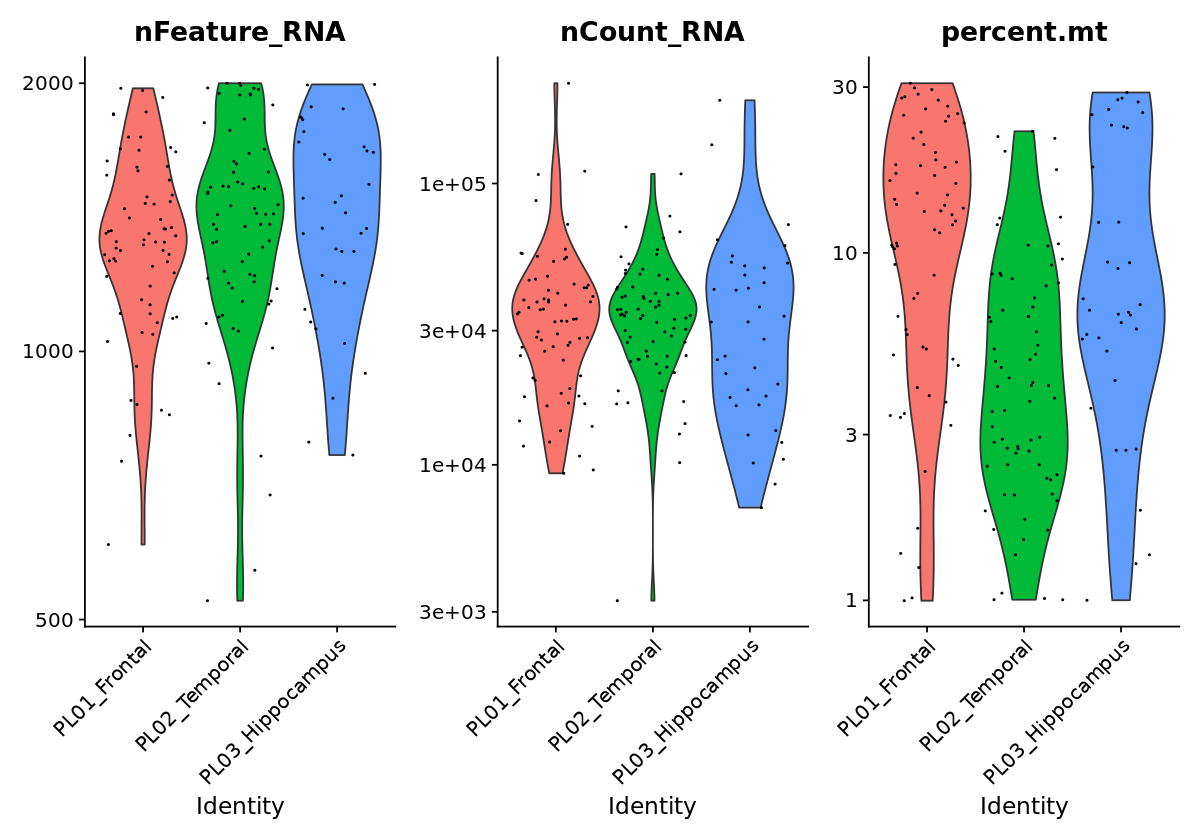

In [19]:
df0 <- subset(df0, subset = nFeature_RNA < 2000 & nFeature_RNA > 500 & nCount_RNA>1000 & percent.mt<30)
options(repr.plot.width=10, repr.plot.height=7)
VlnPlot(df0, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), group.by = "Region", ncol = 3, pt.size = 0.2,log = T)

In [20]:
merge<-df0

In [21]:
df0 <- SCTransform(object = df0, vars.to.regress = c("percent.mt","nCount_RNA","nFeature_RNA") , verbose = FALSE)

In [22]:
hvg <- VariableFeatures(df0)

In [23]:
top10 <- head(VariableFeatures(df0), 10)

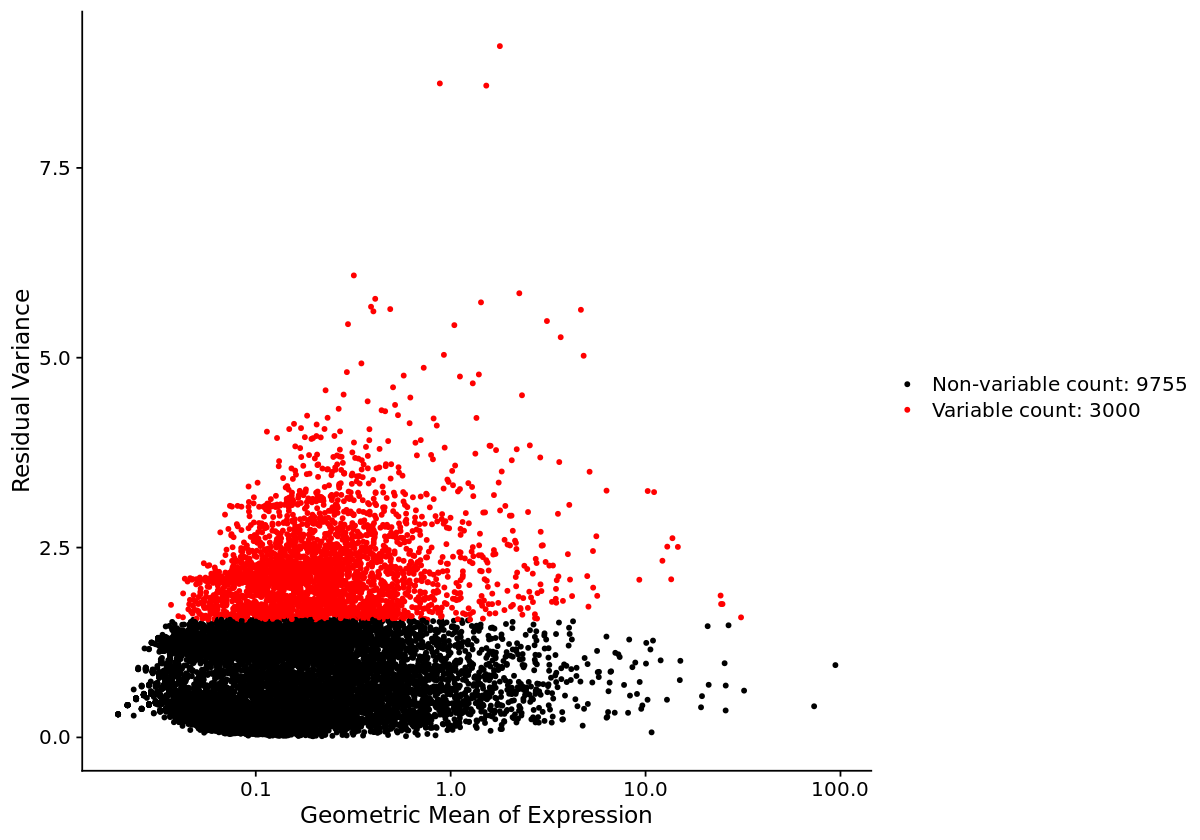

In [24]:
plot1 <- VariableFeaturePlot(df0)
plot1

In [25]:
df0 <- RunPCA(df0, npcs = 100, ndims.print = 1:5, nfeatures.print = 10)

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
PC_ 1 
Positive:  PCLO, MPHOSPH8, RIMS2, AHI1, GCC2, ZC3H13, CCDC171, ERC2, MIS18BP1, CASP8AP2 
Negative:  SLC1A2, ZMAT1, PTGDS, RYR3, DST, ATP1A2, FGFR3, SLC1A3, PSD2, CST3 
PC_ 2 
Positive:  MBP, FTH1, PLP1, BEST1, MOBP, TMEM165, LAMP2, TMEM144, CLMN, FRYL 
Negative:  TRIP11, GOLIM4, RBBP6, SLC1A2, ZNF638, AKAP9, SAT1, ANKRD30B, BDP1, CXCL14 
PC_ 3 
Positive:  FBXW7, ARAP2, HACD4, ZNF721, PCNT, MPHOSPH8, RUFY2, R3HDM1, DMD, CIT 
Negative:  CXCL14, ANKRD30B, GRIK1, GOLGA4, NTNG1, RBBP6, MAF, ERC1, RGS12, CCDC14 
PC_ 4 
Positive:  MRI1, NR2C2, NTNG1, IFNGR2, PSMD7, MTFR1L, SMAP1, DAP3, PPP1R9B, ZYX 
Negative:  RBBP6, ATRX, GOLGA4, PCLO, HACD4, NIN, RTF1, ZC3H13, CAMSAP2, AHCTF1 
PC_ 5 
Positive:  RNF130, TOM1L2, METTL7A, FRMD5, DENND5A, CCAR1, C12orf76, HLTF, HP1BP3, NPC1 
Negative:  PHF3, MLH3, ZNF224, NAA16, NAP1L4, RPL19, EXOC6B

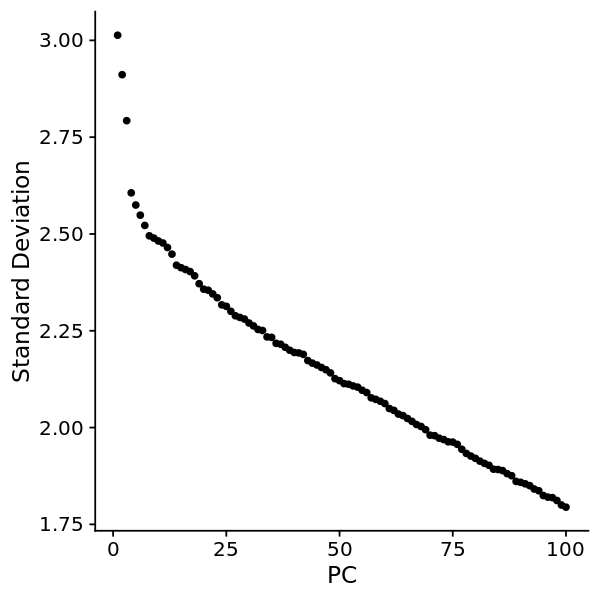

In [26]:
options(repr.plot.width=5, repr.plot.height=5)
ElbowPlot(df0, ndims = 100)

In [27]:
plan(strategy = "multicore")
df0 <- RunUMAP(df0,
               n.neighbors = 50,
               min.dist = 0.1,
               metric = 'cosine',
               n.components = 2, 
               dims = 1:4, 
               n.epochs = 100,
               verbose = F)
#df1 <- RunUMAP(df1, min.dist = 0.1, dims = c(1:20), n.components = 2, verbose = F)
plan(strategy = "sequential")

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


In [28]:
#df0 <- FindNeighbors(object = df0, k.param = 20, reduction = 'umap', dims = 1:2, verbose = F)
df0 <- FindNeighbors(df0, reduction = 'pca', dims =c(1:4), verbose = F)

In [29]:
df0 <- FindClusters(object = df0, resolution = 0.5)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 178
Number of edges: 5418

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6137
Number of communities: 3
Elapsed time: 0 seconds


In [30]:
df0

An object of class Seurat 
31511 features across 178 samples within 2 assays 
Active assay: SCT (12755 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

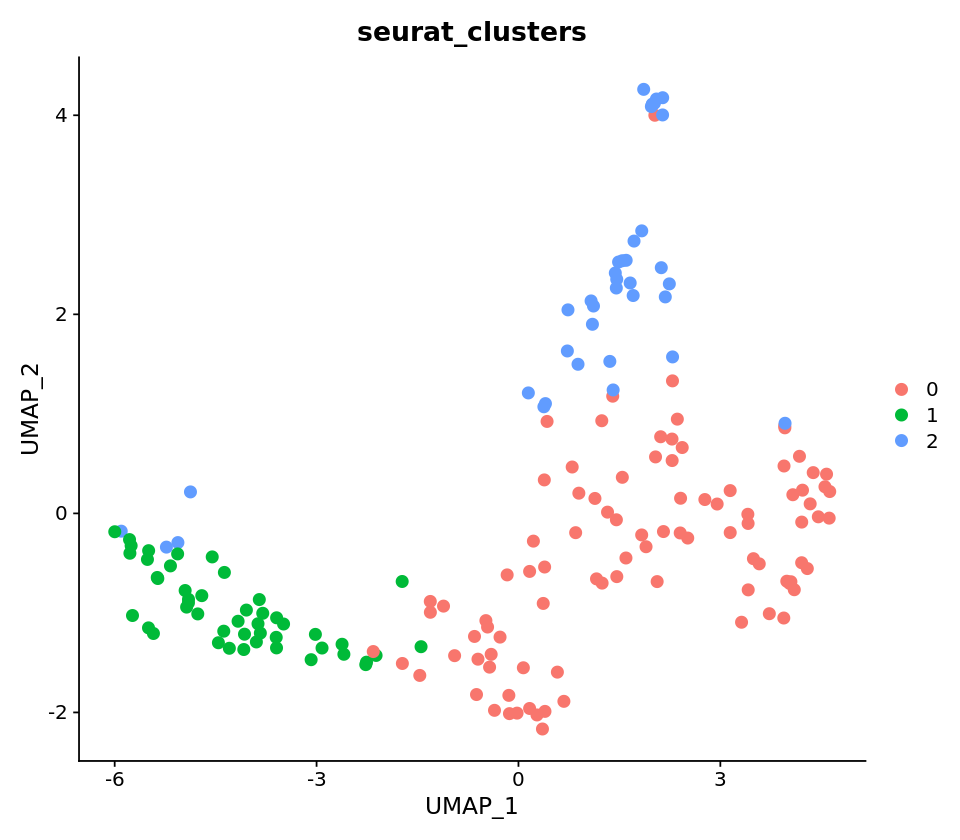

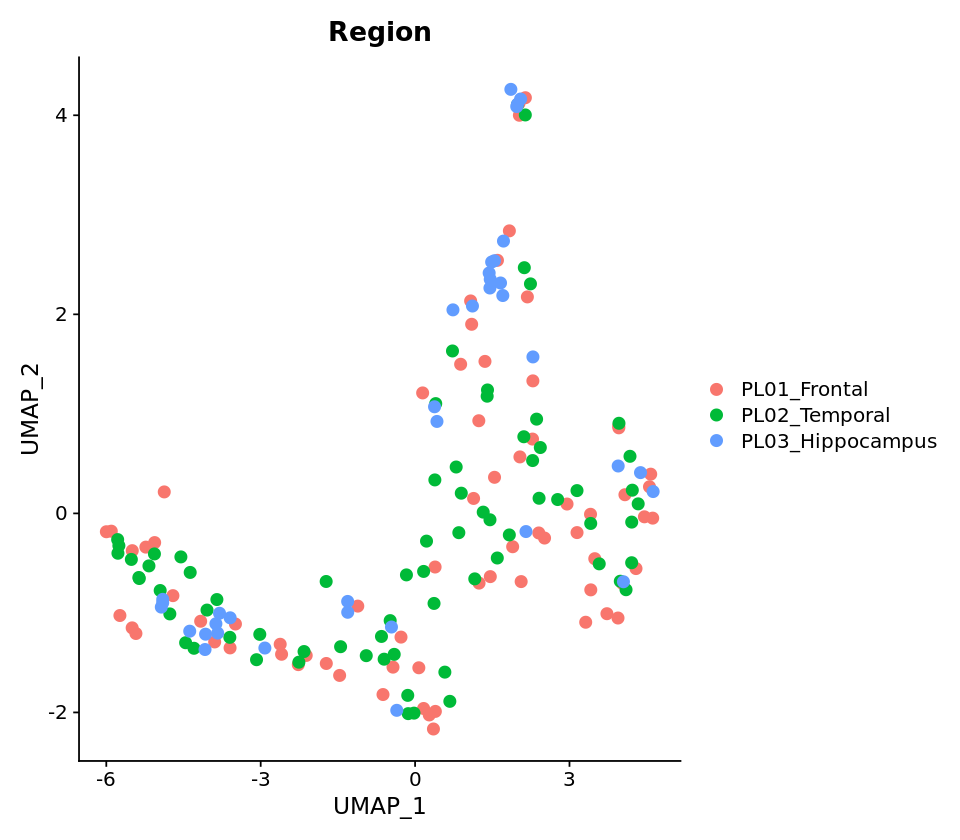

In [31]:
options(repr.plot.width=8, repr.plot.height=7)
DimPlot(df0,reduction = 'umap',pt.size=3, group.by =c('seurat_clusters'),label = F)
options(repr.plot.width=8, repr.plot.height=7)
DimPlot(df0,reduction = 'umap',pt.size=3, group.by =c('Region'),label = F)

In [51]:
pdf(file="../Interneuron/20221223_7669_Ampliseq_QC/Bioskryb/UMAP_Region.pdf",width=10,height=8)
DimPlot(df0,reduction = 'umap',pt.size=3, group.by =c('Region'),label = F)
dev.off()
pdf(file="../Interneuron/20221223_7669_Ampliseq_QC/Bioskryb/UMAP_cluster.pdf",width=9,height=8)
DimPlot(df0,reduction = 'umap',pt.size=3, group.by =c('seurat_clusters'),label = F)
dev.off()

png 
  2

png 
  2

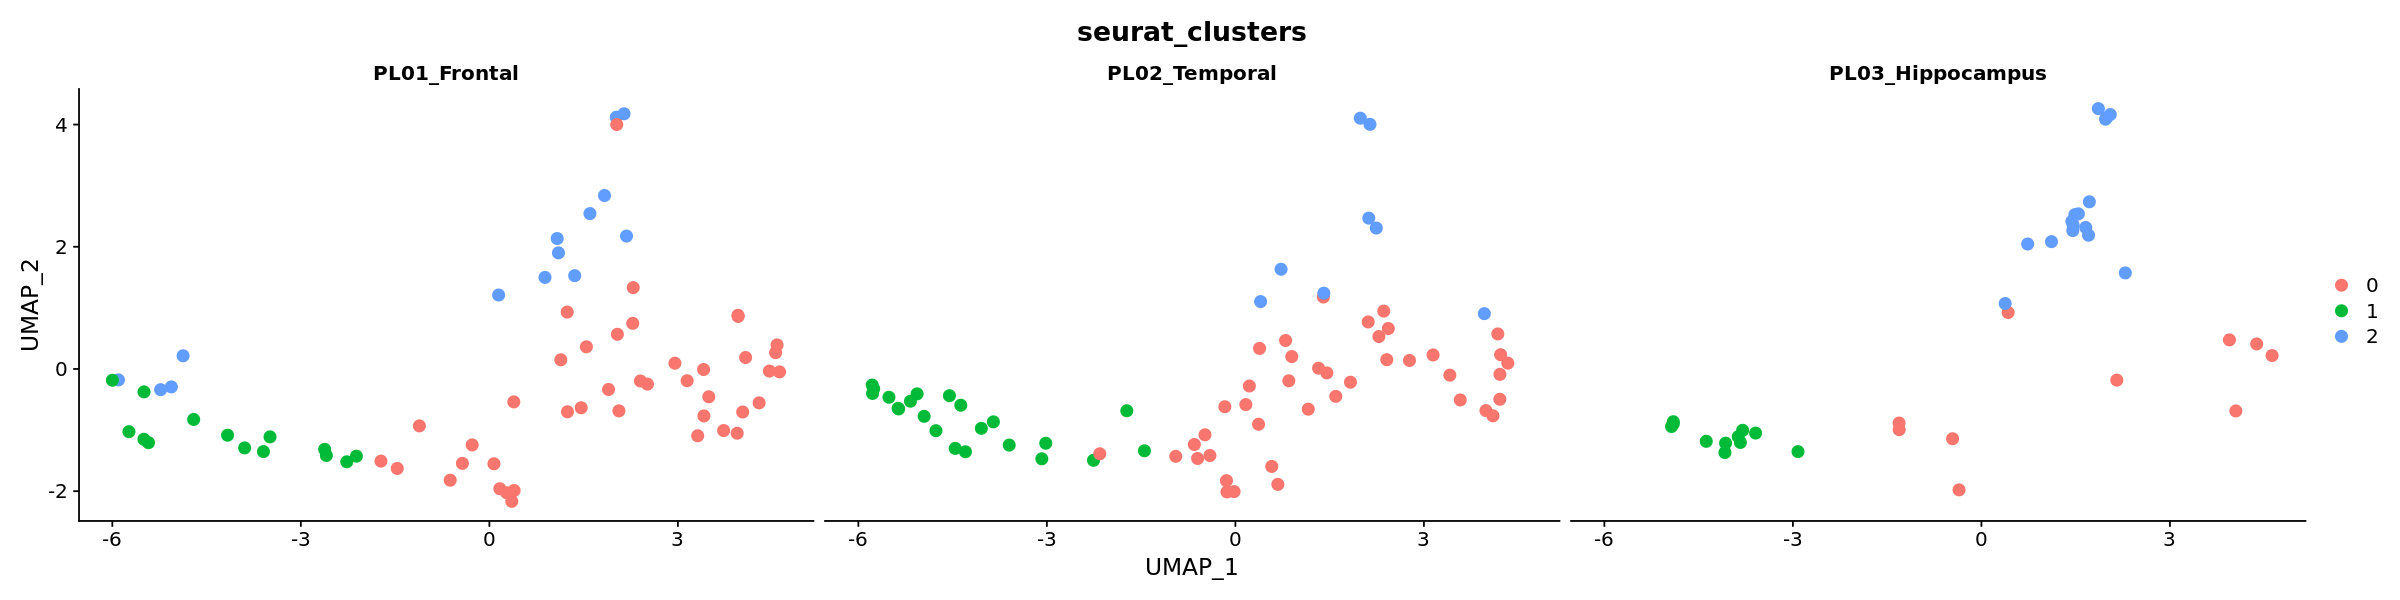

In [32]:
options(repr.plot.width=20, repr.plot.height=5)
DimPlot(df0,reduction = 'umap',pt.size=3, group.by =c('seurat_clusters'), split.by=c("Region"),label = F)

[[1]]


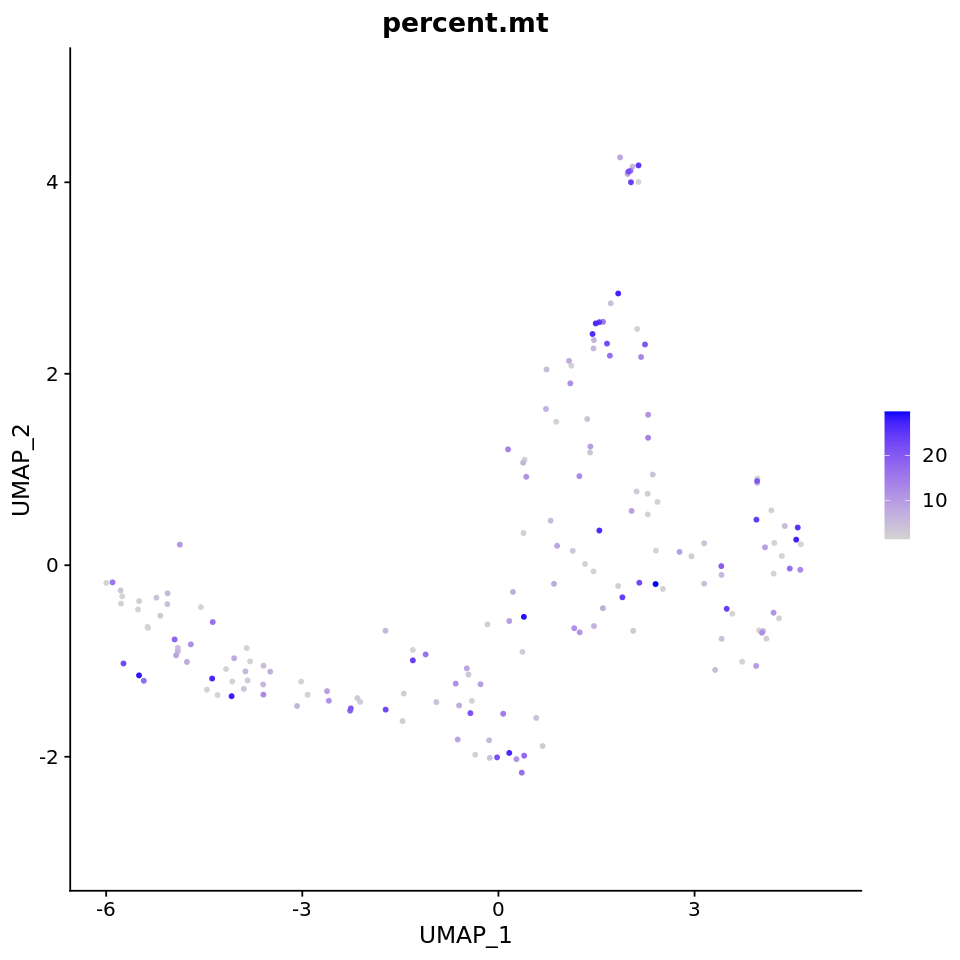

In [33]:
options(repr.plot.width=8, repr.plot.height=8)

FeaturePlot(df0,
                     slot = 'data',
                     pt.size = 1,
                     reduction = "umap",
                     combine = F,
                     min.cutoff = 'q15',
                    # max.cutoff = 'q99',
                    order = T,
                    features = c('percent.mt'))

In [44]:
rm(plist)
plist <- FeaturePlot(df0,
                     slot = 'data',
                     pt.size = 1,
                     reduction = "umap",
                     combine = F,
                     min.cutoff = 'q15',
                    # max.cutoff = 'q99',
                    order = T,
                    features = c('SYT1','RBFOX3','CAMK2A','CUX2','SATB2','RORB','TLE4',
                                 'GAD1','GAD2','GRIK1','ERBB4','NR2F2',
                                 'GFAP','SLC1A2','SLC1A3','MMD2',
                                 'OLIG2','MOBP','PLP1','PDGFRA',
                                 'SPI1'
                       ))

In [45]:
for(i in 1:length(plist)){
    plist[[i]] <- plist[[i]] +
                scale_color_gradientn(colours = c('grey90',RColorBrewer::brewer.pal(n = 9,name = 'YlOrRd'))) +
                NoLegend() + 
                NoAxes()
}

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is

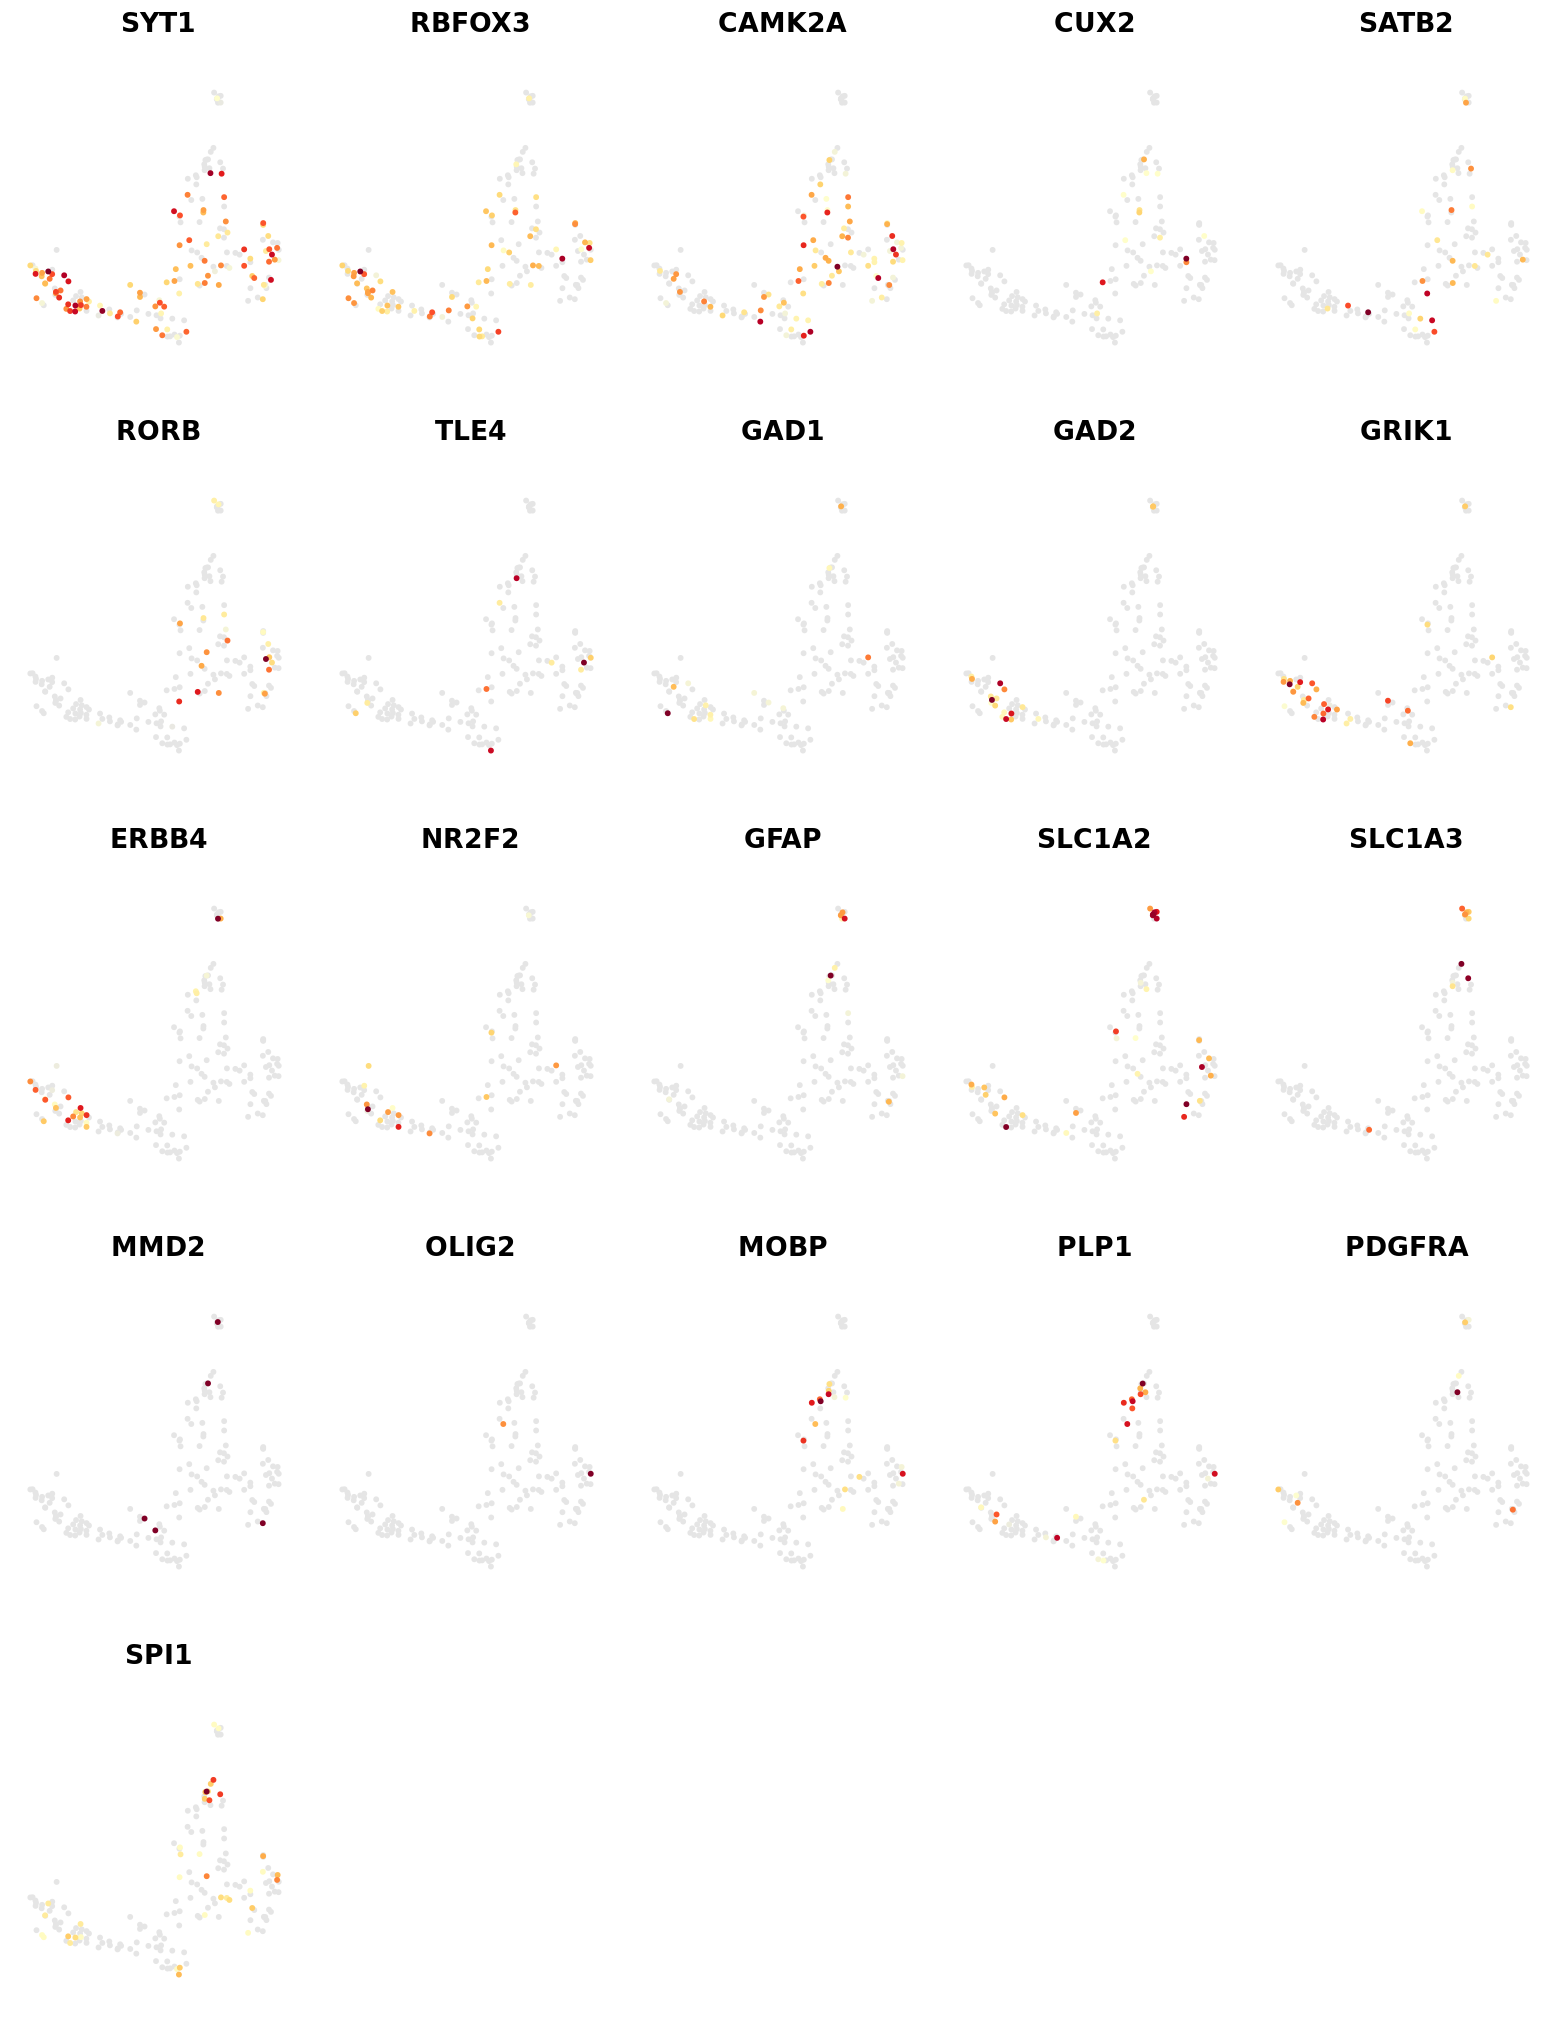

In [46]:
options(repr.plot.width=13, repr.plot.height=17)
do.call(gridExtra::grid.arrange, plist)

In [37]:
df0.markers <- FindAllMarkers(df0, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

Calculating cluster 0

For a more efficient implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the limma package
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('limma')
--------------------------------------------
After installation of limma, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session

Calculating cluster 1

Calculating cluster 2



In [38]:
df0.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_log2FC)

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
4.189734e-11,1.1373774,0.710,0.306,5.344006e-07,0,PPFIA2
2.078564e-10,1.1174183,0.677,0.212,2.651209e-06,0,FBXW7
7.110187e-10,0.8623279,0.667,0.200,9.069044e-06,0,CHN1
1.050479e-09,0.9168401,0.785,0.318,1.339886e-05,0,ATP2B1
2.367507e-09,1.0460176,0.548,0.141,3.019755e-05,0,NRGN
3.384788e-09,0.9080844,0.462,0.059,4.317297e-05,0,CNKSR2
6.720157e-08,0.9743244,0.591,0.224,8.571561e-04,0,PCNT
2.345421e-07,0.7764041,0.548,0.176,2.991585e-03,0,CAMK1D
3.961644e-06,0.8143079,0.548,0.235,5.053077e-02,0,R3HDM1


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


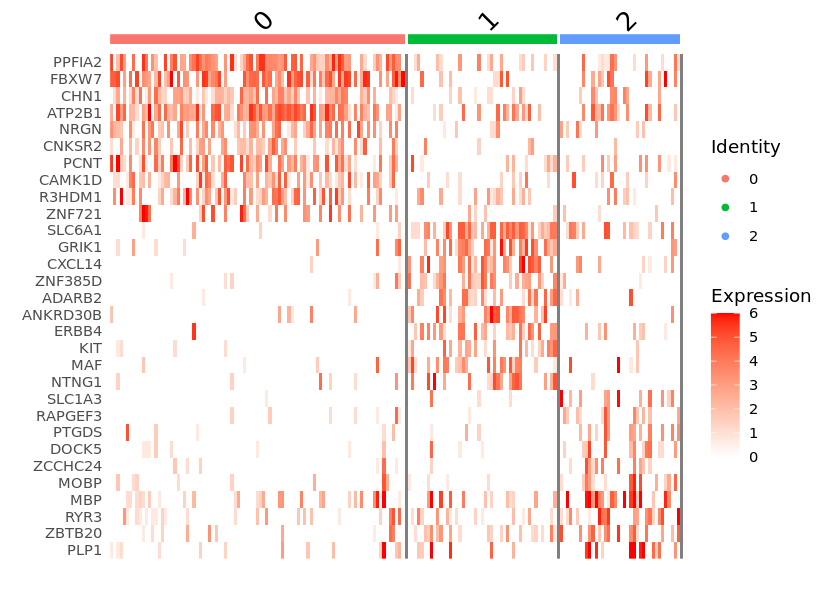

In [39]:
top10 <- df0.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_log2FC)
options(repr.plot.width=7, repr.plot.height=5)
DoHeatmap(df0, slot = "data", features = top10$gene) + scale_fill_gradientn(colors = c("white", "red"))

In [47]:
pdf(file="../Interneuron/20221223_7669_Ampliseq_QC/Bioskryb/DEG_heatmap.pdf",width=8,height=5)
DoHeatmap(df0, slot = "data", features = top10$gene) + scale_fill_gradientn(colors = c("white", "red"))
dev.off()

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


png 
  2

In [52]:
saveRDS(df0, "../Interneuron/20221223_7669_Ampliseq_QC/Bioskryb/Bioskryb_snRNAseq.rds")

# Print cell type information

In [2]:
df0<-readRDS("./Bioskryb_snRNAseq.rds")

In [3]:
df0@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,Cell_ID,Region,percent.mt,nCount_SCT,nFeature_SCT,SCT_snn_res.0.5,seurat_clusters
,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<fct>,<fct>
bioskryb_7669_F1_X.projects.ps.gleesonlab8.User.arzoo.20230706_Changuk_7669RF1_Bioskryb_RNA_IGM.output.star.PL01.Frontal.RNA.SC01_S1.PL01.Frontal.RNA.SC01_S1.Aligned.sortedByCoord.out.bam,bioskryb_7669_F1,35761,1325,SC01,PL01_Frontal,26.88948755,33843,1233,0,0
bioskryb_7669_F1_X.projects.ps.gleesonlab8.User.arzoo.20230706_Changuk_7669RF1_Bioskryb_RNA_IGM.output.star.PL01.Frontal.RNA.SC02_S2.PL01.Frontal.RNA.SC02_S2.Aligned.sortedByCoord.out.bam,bioskryb_7669_F1,43525,1365,SC02,PL01_Frontal,5.01552714,35680,1265,0,0
bioskryb_7669_F1_X.projects.ps.gleesonlab8.User.arzoo.20230706_Changuk_7669RF1_Bioskryb_RNA_IGM.output.star.PL01.Frontal.RNA.SC04_S4.PL01.Frontal.RNA.SC04_S4.Aligned.sortedByCoord.out.bam,bioskryb_7669_F1,26287,1405,SC04,PL01_Frontal,28.51061882,30276,1263,1,1
bioskryb_7669_F1_X.projects.ps.gleesonlab8.User.arzoo.20230706_Changuk_7669RF1_Bioskryb_RNA_IGM.output.star.PL01.Frontal.RNA.SC05_S5.PL01.Frontal.RNA.SC05_S5.Aligned.sortedByCoord.out.bam,bioskryb_7669_F1,34873,1556,SC05,PL01_Frontal,3.74006962,33623,1436,1,1
bioskryb_7669_F1_X.projects.ps.gleesonlab8.User.arzoo.20230706_Changuk_7669RF1_Bioskryb_RNA_IGM.output.star.PL01.Frontal.RNA.SC09_S8.PL01.Frontal.RNA.SC09_S8.Aligned.sortedByCoord.out.bam,bioskryb_7669_F1,27234,1576,SC09,PL01_Frontal,27.13466919,29574,1392,2,2
bioskryb_7669_F1_X.projects.ps.gleesonlab8.User.arzoo.20230706_Changuk_7669RF1_Bioskryb_RNA_IGM.output.star.PL01.Frontal.RNA.SC10_S9.PL01.Frontal.RNA.SC10_S9.Aligned.sortedByCoord.out.bam,bioskryb_7669_F1,37902,1355,SC10,PL01_Frontal,18.44903172,34348,1281,1,1
bioskryb_7669_F1_X.projects.ps.gleesonlab8.User.arzoo.20230706_Changuk_7669RF1_Bioskryb_RNA_IGM.output.star.PL01.Frontal.RNA.SC11_S10.PL01.Frontal.RNA.SC11_S10.Aligned.sortedByCoord.out.bam,bioskryb_7669_F1,9326,1101,SC11,PL01_Frontal,15.68589620,23196,1027,2,2
bioskryb_7669_F1_X.projects.ps.gleesonlab8.User.arzoo.20230706_Changuk_7669RF1_Bioskryb_RNA_IGM.output.star.PL01.Frontal.RNA.SC12_S11.PL01.Frontal.RNA.SC12_S11.Aligned.sortedByCoord.out.bam,bioskryb_7669_F1,41706,1372,SC12,PL01_Frontal,2.88073602,35446,1295,0,0
bioskryb_7669_F1_X.projects.ps.gleesonlab8.User.arzoo.20230706_Changuk_7669RF1_Bioskryb_RNA_IGM.output.star.PL01.Frontal.RNA.SC14_S13.PL01.Frontal.RNA.SC14_S13.Aligned.sortedByCoord.out.bam,bioskryb_7669_F1,37976,1609,SC14,PL01_Frontal,12.77718097,34460,1489,0,0


In [4]:
write.table(df0@meta.data,"./Bioskryb_RNA_cell_type_info.txt",sep="\t", row.names=FALSE, col.names=TRUE)